
Image Denoising Tutorial with Fashion MNIST Dataset
================================================

What is Image Noise?
------------------
Image noise is unwanted variation in brightness or color that makes an image look grainy or unclear. It's common in photos taken in low light or with smartphone cameras.


What is Image Denoising?
-----------------------
Image denoising is the process of removing unwanted noise or distortions from digital images. Noise can appear
as random variations in brightness or color, making images look grainy, unclear, or distorted. This noise can
occur due to various factors like:
- Low light conditions
- Sensor limitations in cameras
- Data transmission errors
- Digital compression artifacts

Common Denoising Methods:
1. Gaussian Blur: Uses a Gaussian function to create a smoothing effect
2. Median Blur: Replaces each pixel with the median of neighboring pixels
3. Bilateral Filter: Edge-preserving smoothing filter that maintains sharp edges
4. Non-Local Means: Advanced algorithm that considers similar patches across the image



Dataset Information:
------------------
Fashion MNIST is a dataset of Zalando's article images, consisting of 70,000 grayscale images (60,000 training,
10,000 testing) in 10 fashion categories. Each image is 28x28 pixels. It's commonly used as a more challenging
drop-in replacement for the original MNIST dataset.

Let's implement various denoising techniques on Fashion MNIST images:

In [ ]:
!pip install opencv-python matplotlib numpy

In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load the Fashion MNIST dataset
# We only need the images (X), not the labels (_)
(X_train, _), (X_test, _) = fashion_mnist.load_data()

In [ ]:
# Select a sample image for processing
sample_image = X_test[5]  # Select an image from test dataset
sample_image = cv2.resize(sample_image, (128, 128))  # Resize for better visualization

In [ ]:
# This function adds Gaussian noise to simulate camera sensor noise or poor lighting conditions
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

In [ ]:
# This function adds salt-and-pepper noise, which appears as random white and black pixels
def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Add white pixels (salt)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add black pixels (pepper)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

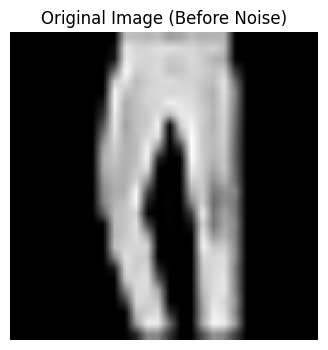

In [15]:
# Step 1: Show the original image immediately after loading
plt.figure(figsize=(4, 4))
plt.imshow(sample_image, cmap='gray')
plt.title("Original Image (Before Noise)")
plt.axis('off')
plt.show()

In [ ]:
# Apply noise to the sample image
gaussian_noisy_image = add_gaussian_noise(sample_image)
salt_pepper_noisy_image = add_salt_pepper_noise(sample_image)

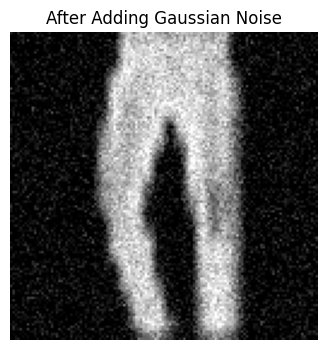

In [16]:
# Step 2: Show Gaussian noisy image
plt.figure(figsize=(4, 4))
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title("After Adding Gaussian Noise")
plt.axis('off')
plt.show()

salt_pepper_noisy_image = add_salt_pepper_noise(sample_image)

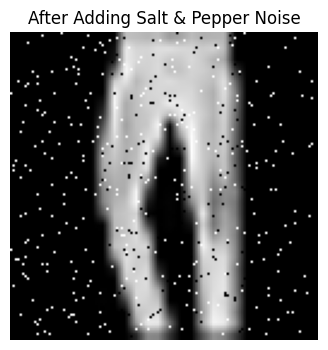

In [17]:
# Step 3: Show Salt & Pepper noisy image
plt.figure(figsize=(4, 4))
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title("After Adding Salt & Pepper Noise")
plt.axis('off')
plt.show()

In [ ]:
# This function applies different denoising methods to compare their effectiveness
def apply_denoising(image):
    denoised_results = {
        'Original': image,
        'Gaussian Blur': cv2.GaussianBlur(image, (5,5), 0),  # Kernel size 5x5
        'Median Blur': cv2.medianBlur(image, 5),             # Kernel size 5
        'Bilateral Filter': cv2.bilateralFilter(image, 9, 75, 75),  # Preserves edges
        'Non-Local Means': cv2.fastNlMeansDenoising(image, None, 30, 7, 21)  # Advanced denoising
    }
    return denoised_results

In [ ]:
# Apply noise reduction methods
gaussian_denoised = apply_denoising(gaussian_noisy_image)
salt_pepper_denoised = apply_denoising(salt_pepper_noisy_image)

In [ ]:
# Plot the results
def display_results(title, noisy, denoised_dict):
    plt.figure(figsize=(15, 4))

    # Display original noisy image
    plt.subplot(1, len(denoised_dict) + 1, 1)  # Changed to accommodate all images
    plt.imshow(noisy, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Display denoised images
    for idx, (key, img) in enumerate(denoised_dict.items()):
        plt.subplot(1, len(denoised_dict) + 1, idx + 2) # Changed to accommodate all images
        plt.imshow(img, cmap='gray')
        plt.title(key)
        plt.axis('off')

    plt.show()

Gaussian Noise Reduction:


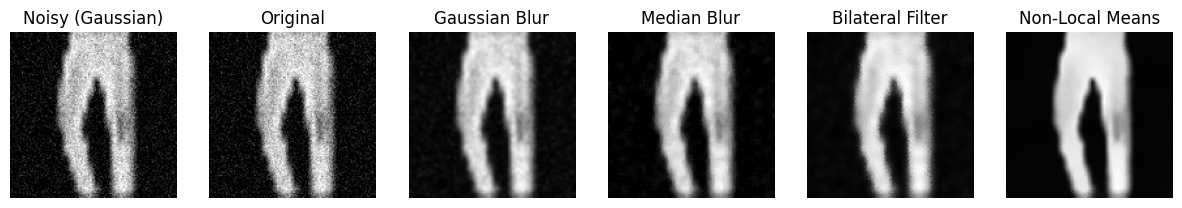

Salt & Pepper Noise Reduction:


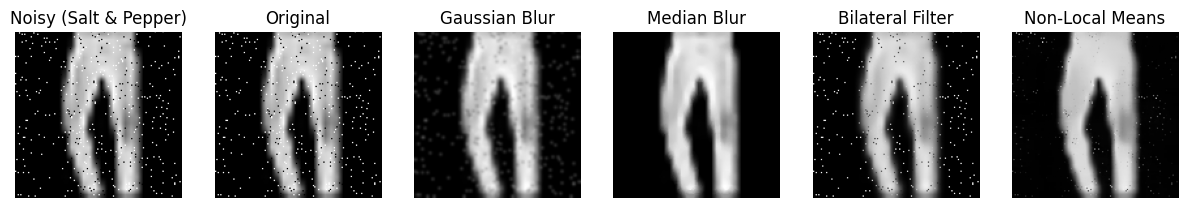

In [10]:
# Show results
print("Gaussian Noise Reduction:")
display_results("Noisy (Gaussian)", gaussian_noisy_image, gaussian_denoised)

print("Salt & Pepper Noise Reduction:")
display_results("Noisy (Salt & Pepper)", salt_pepper_noisy_image, salt_pepper_denoised)

Looking at the image denoising results shown, I can explain the key observations and conclusions:

1. Gaussian Noise Results:


Original image was corrupted with Gaussian noise, making it appear grainy with random intensity variations
Different denoising methods showed varying effectiveness:

- Gaussian Blur: Reduced noise but introduced some blurring
- Median Blur: Preserved edges better than Gaussian blur
- Bilateral Filter: Maintained edge detail while reducing noise
- Non-Local Means: Provided good balance between noise reduction and detail preservation




2. Salt & Pepper Noise Results:


Original image had random white (salt) and black (pepper) pixels scattered throughout
The denoising methods performed differently:

- Median Blur: Performed exceptionally well, as expected for salt & pepper noise
- Gaussian Blur: Less effective, tended to spread the noise
- Bilateral Filter: Preserved edges while removing noise
- Non-Local Means: Good overall noise reduction



Key Conclusions:

- Different noise types require different denoising approaches:

- Median blur works best for salt & pepper noise
Bilateral and Non-Local Means are good for Gaussian noise


Trade-offs observed:

- More aggressive noise reduction often leads to more blurring
- Edge preservation comes at the cost of some remaining noise


Best Overall Methods:

- Bilateral Filter: Good balance between noise reduction and detail preservation
- Non-Local Means: Effective for both types of noise while maintaining image structure


The Fashion MNIST dataset sample was successfully denoised while maintaining its recognizable features across different methods.
